#  Gender Classification using CNN Transfer Learning on Kaggle Dataset

#### Group ELU (S12):
#### - ESQUIVEL, Vince Anthony
#### - LIM, Mark Willbur
#### - UY, Justin Riley

## Introduction

The main objective of this notebook is to see how CNN Transfer Learning is used together along with a gender classification dataset to create a deep learning model that can reliably predict the correct data. We will utilizing a Kaggle Dataset containing 58,000~ cropped male and female images in total separated by its training and validation sets. The dataset could be found [here.](https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset)

We will utilize the Keras package to create our CNN Transfer Learning Model and train it using our Gender Classification Dataset. You can read and find out more about Keras through its documentation [here.](https://keras.io/about/) 
  
Lastly, we will compare the data from three (4) pre-trained CNN models and its performance after being trained and validated on our Gender Classification Dataset.

## Requirements from Rubric (dont delete muna)

An overview or description of the data is provided, including how it was collected, and its implications on the types of conclusions that could be made from the data. A description of the variables, observations, and/or structure of the data is provided. The target task is well introduced and clearly defined.

The data is sufficiently explored to get a grasp of the distribution and the content of the data. Appropriate summaries and visualizations are presented. Insights into how the EDA can help the model training is mentioned.

The necessary steps for preprocessing and cleaning are performed, including explanations for every step. If no preprocessing or cleaning is done, there is a justification on why it was not needed.

The appropriate models are used to accomplish the machine learning task. Justification of choosing the models is shown.

Appropriate data-driven error analysis is made, and changes to the model selection and hyperparameters are performed to improve model performance. The study exhausts improvements that can be done to the model

The study is concluded by effectively summarizing the efforts of the authors. Recommendations on how the model could be further improved are provided.

## About the Dataset

The Gender Classification Dataset is taken from Kaggle.com which could be found [here.]( https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset) There is no specified source for the data but upon further inspection it could be assumed that the images were taken from the internet and cropped to a specific dimension for all images to follow.
    
The dataset contains the following data: 
   
1.) **Test Set**  
- 23766 male images  
- 23243 female images  
2.) **Validation Set**
- 5808 images  
- 5841 images 

All the images come in **.png** format and come in slightly different dimensions but are measured roughly at around 80 x 100 pixels. We will be utilizing this dataset in order to see its performance in different CNN pre-trained models to see which would perform as the best.

## Importing Required Libraries
The most important package required for this notebook is Keras which we will use to form our models. Keras will also provide the pre-trained models we will utilize for the transfer learning portion of our CNN model as well as provide a means to read our data from the folders. You can learn more about Keras from their API documentation [here.](https://keras.io/about/)

In [1]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

from glob import glob

# For checkpoints and time computation
from datetime import datetime
from keras.callbacks import ModelCheckpoint

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

Read 23766 images from the training male set.
Read with 23243 images from the training female set.
Read with 5808 images from the validation male set.
Read with 5841 images from the validation female set.
090544.jpg.jpg


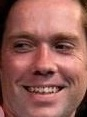

131422.jpg.jpg


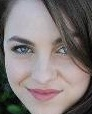

063429.jpg.jpg


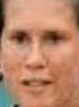

112944.jpg.jpg


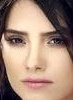

090545.jpg.jpg


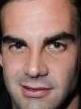

131423.jpg.jpg


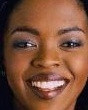

063430.jpg.jpg


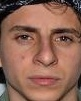

112950.jpg.jpg


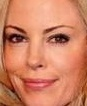

090548.jpg.jpg


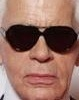

131425.jpg.jpg


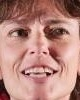

063438.jpg.jpg


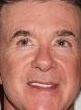

112953.jpg.jpg


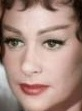

In [2]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch 

tm_path = './train/male'
tf_path = './train/female'
vm_path = './valid/male'
vf_path = './valid/female'

male_train = [f for f in os.listdir(tm_path) if os.path.isfile(os.path.join(tm_path, f))]
print("Read {0} images from the training male set.".format(len(male_train)))

female_train = [f for f in os.listdir(tf_path) if os.path.isfile(os.path.join(tf_path, f))]
print("Read with {0} images from the training female set.".format(len(female_train)))

male_valid = [f for f in os.listdir(vm_path) if os.path.isfile(os.path.join(vm_path, f))]
print("Read with {0} images from the validation male set.".format(len(male_valid)))

female_valid = [f for f in os.listdir(vf_path) if os.path.isfile(os.path.join(vf_path, f))]
print("Read with {0} images from the validation female set.".format(len(female_valid)))

for i in range(3):
    print(male_train[i])
    display(_Imgdis(filename=tm_path + "/" + male_train[i], width=240, height=240))
    print(female_train[i])
    display(_Imgdis(filename=tf_path + "/" + female_train[i], width=240, height=240))
    print(male_valid[i])
    display(_Imgdis(filename=vm_path + "/" + male_valid[i], width=240, height=240))
    print(female_valid[i])
    display(_Imgdis(filename=vf_path + "/" + female_valid[i], width=240, height=240))

## Preprocessing and Cleaning our Dataset
Upon discussing on our dataset and our model, we decided that **no data cleaning or preprocessing would be required** as the CNN model **does not require** images to have the same size therefore there is no need to set a specific width and height for the dimensions of all images.

## Choosing our Pre-trained Models
In CNN Transfer Learning, the bare minimum requirement is to utilize a pre-trained model that has been trained under a certain image set. When we chose our pre-trained models, we utilized the available architectures present in the Keras API. Details on all their available pre-trained models could be found [here.](https://keras.io/api/applications/) By using pre-trained models, we make our job of creating a CNN Transfer Learning model easier as the architecture for the model is provided to you already; it also results in having a better overall accuracy since the model has already been trained beforehand. The models we will be using have differ in the image set they are trained under, the layers present in the model, and the number of parameters in the model.

When we chose our pre-trained models, we took into account different factors (chosen through in no particular order) such as performance, popularity, number of parameters, and through suggestions of other independent entities online. VGG16 (and another variation, VGG19) is considered to be one of the most popular pre-trained models which is why we chose to use them for this project. EfficientNetB0 was the model with the least amount of parameters but was known also for its performance in CNN. Lastly, we chose Xception since like the other two models, it was frequently used in classification CNN models and served as the middleground in terms of the number of parameters between VGG16/VGG19 and Xception.

## Using VGG16 Model

VGG16 is a CNN model that consists of 13 convolutional layers, and three dense layers. It is currently the most preferred choice for extracting features from images due to its very uniform architecture. Due to its high classification accuracy of 92.7% from 1000 images of 1000 different categories, we decided to use this as our initial model.

### Pre-processing Data using Data Augmentation

In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess

train_datagen = ImageDataGenerator(
    preprocessing_function=vgg16_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    preprocessing_function=vgg16_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)


### Reading Train and Validation Images

We will provide the directory in which it was found and set the target_size, batch size and class_mode. The target_size is based on the recommended target_size found in the VGG16 documentation. The batch_size is set to its default value which is 32). Although our data is binary in nature, we chose our class_mode to be categorical to avoid errors in our program. It also does not matter since the difference between binary and categorical as class_modes are in the way the features are encoded.

In [4]:
train_set_vgg16 = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg16 = test_datagen.flow_from_directory('./valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [5]:
from keras import optimizers
from keras_tuner import RandomSearch
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
folders = glob('./train/**')

vgg16 = VGG16(input_shape=(224, 224, 3), pooling='avg', weights='imagenet', include_top=False)

for layer in vgg16.layers:
  layer.trainable = False

def build_model_vgg16(hp):
    x = Flatten()(vgg16.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)
    model_vgg16.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_vgg16

In [6]:
tuner_vgg16 = RandomSearch(
        build_model_vgg16,
        objective='val_accuracy',
        max_trials = 3,
        executions_per_trial= 2,
        directory='STINTSY-Gender-Classification',
        project_name='VGG16_Hyperparameter_Tuning')

tuner_vgg16.search(train_set_vgg16, epochs = 3, validation_data = valid_set_vgg16)

Trial 3 Complete [00h 35m 37s]
val_accuracy: 0.8681432008743286

Best val_accuracy So Far: 0.8681432008743286
Total elapsed time: 01h 54m 24s
INFO:tensorflow:Oracle triggered exit


In [7]:
best_model_vgg16 = tuner_vgg16.get_best_models()[0]

best_model_vgg16.summary()
for i, layer in enumerate(best_model_vgg16.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
checkpoint = ModelCheckpoint(filepath='vgg16.h5',
                             save_best_only=True,
                             monitor= 'val_accuracy',
                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_vgg16.filenames)//batch_size
history_vgg16 = best_model_vgg16.fit(train_set_vgg16, epochs = 10, validation_data = valid_set_vgg16,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_vgg16 = datetime.now() - start
print("Training completed in time: ", duration_vgg16)

Epoch 1/10
91/91 [==============================] - 36s 398ms/step - loss: 0.4220 - accuracy: 0.8310 - val_loss: 0.3487 - val_accuracy: 0.8585
Epoch 2/10
91/91 [==============================] - 36s 393ms/step - loss: 0.4321 - accuracy: 0.8252 - val_loss: 0.3399 - val_accuracy: 0.8620
Epoch 3/10
91/91 [==============================] - 36s 394ms/step - loss: 0.4300 - accuracy: 0.8355 - val_loss: 0.3375 - val_accuracy: 0.8726
Epoch 4/10
91/91 [==============================] - 35s 391ms/step - loss: 0.4250 - accuracy: 0.8386 - val_loss: 0.3444 - val_accuracy: 0.8644
Epoch 5/10
91/91 [==============================] - 36s 393ms/step - loss: 0.4310 - accuracy: 0.8283 - val_loss: 0.3410 - val_accuracy: 0.8626
Epoch 6/10
91/91 [==============================] - 36s 392ms/step - loss: 0.4122 - accuracy: 0.8324 - val_loss: 0.3464 - val_accuracy: 0.8633
Epoch 7/10
91/91 [==============================] - 35s 391ms/step - loss: 0.3906 - accuracy: 0.8510 - val_loss: 0.3465 - val_accuracy: 0.8626

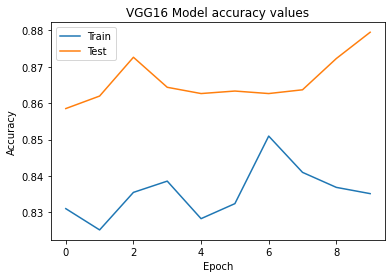

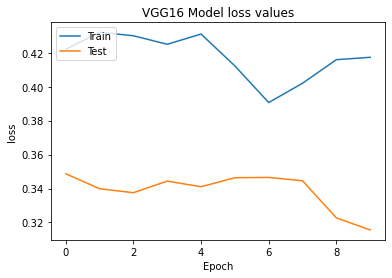

In [9]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('VGG16 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = best_model_vgg16.evaluate(valid_set_vgg16, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 10s 193ms/step - loss: 0.3169 - accuracy: 0.8719
test acc: 0.871874988079071
test_loss: 0.316890150308609


# Using Keras Xception Model

The Xception Model is a CNN model based from the inception model. Other CNN models had to stack convolution layers deeper and deeper until they get better performance. The inception model put the layers all together into one model. It consists of repeating modules also known as inception modules. These modules contain 1x1, 3x3, and 5x5 convolutional layers, pooling layers, concatenations, and dropouts. The Xception model takes the inception model to the extreme. Instead of partitioning the data into chunks, it maps the spatial correlations for each output channel separately then performs depthwise convolution. With this, Xception performs better at larger datasets compared to Inception.

In [11]:
from keras.applications.xception import preprocess_input as xception_preprocess

train_datagen = ImageDataGenerator(
                preprocessing_function=xception_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(
                preprocessing_function=xception_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

### kekw

In [12]:
train_set_xception = train_datagen.flow_from_directory('./train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_xception = test_datagen.flow_from_directory('./valid',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [13]:
from tensorflow.keras.applications import Xception

xception = Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=(299,299,3))

for layer in xception.layers:
  layer.trainable = False

def build_model_xception(hp):
    x = Flatten()(xception.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_xception = Model(inputs=xception.input, outputs=prediction)
    model_xception.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_xception

In [15]:
tuner_xception = RandomSearch(
        build_model_xception,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='Xception_Hyperparameter_Tuning')

tuner_xception.search(train_set_xception, epochs = 3, validation_data = valid_set_xception)

Trial 3 Complete [01h 03m 30s]
val_accuracy: 0.8622199296951294

Best val_accuracy So Far: 0.8833376467227936
Total elapsed time: 02h 06m 33s
INFO:tensorflow:Oracle triggered exit


In [16]:
best_model_xception = tuner_xception.get_best_models()[0]

best_model_xception.summary()
for i, layer in enumerate(best_model_xception.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [17]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_xception.filenames)//batch_size
history1 = best_model_xception.fit(train_set_xception, epochs= 10, validation_data= valid_set_xception,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_xception = datetime.now() - start
print("Training completed in time: ", duration_xception)

Epoch 1/10
91/91 [==============================] - 66s 713ms/step - loss: 0.3514 - accuracy: 0.8626 - val_loss: 0.2758 - val_accuracy: 0.8839
Epoch 2/10
91/91 [==============================] - 65s 714ms/step - loss: 0.3517 - accuracy: 0.8585 - val_loss: 0.2750 - val_accuracy: 0.8911
Epoch 3/10
91/91 [==============================] - 64s 709ms/step - loss: 0.3691 - accuracy: 0.8520 - val_loss: 0.2847 - val_accuracy: 0.8812
Epoch 4/10
91/91 [==============================] - 64s 711ms/step - loss: 0.3648 - accuracy: 0.8585 - val_loss: 0.2728 - val_accuracy: 0.8905
Epoch 5/10
91/91 [==============================] - 64s 711ms/step - loss: 0.3631 - accuracy: 0.8479 - val_loss: 0.2826 - val_accuracy: 0.8905
Epoch 6/10
91/91 [==============================] - 64s 707ms/step - loss: 0.3552 - accuracy: 0.8602 - val_loss: 0.3433 - val_accuracy: 0.8595
Epoch 7/10
91/91 [==============================] - 64s 709ms/step - loss: 0.3500 - accuracy: 0.8592 - val_loss: 0.2792 - val_accuracy: 0.8884

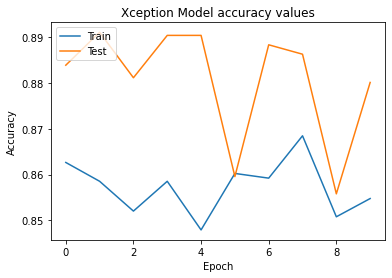

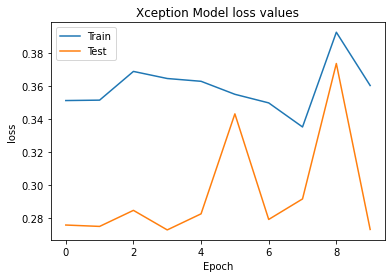

In [18]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Xception Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Xception Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

In [19]:
test_loss, test_acc = best_model_xception.evaluate(valid_set_xception, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 18s 351ms/step - loss: 0.2733 - accuracy: 0.8781
test acc: 0.878125011920929
test_loss: 0.2733263671398163


## Using VGG19 Model
VGG19 is a variant of the VGG16 model that consists of 19 layers instead of 16, adding three more convolutional layers. As there are more layers, the model should be able to fit more complex functions, so it promises better performance compared to VGG16.

In [20]:
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess

train_datagen = ImageDataGenerator(
                preprocessing_function = vgg19_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(
                preprocessing_function = vgg19_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

In [21]:
train_set_vgg19 = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg19 = test_datagen.flow_from_directory('./valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [22]:
from keras.applications.vgg19 import VGG19
from keras_tuner import RandomSearch

folders = glob('./train/**')

vgg19 = VGG19(input_shape=(224, 224, 3), pooling='avg',weights='imagenet', include_top=False)

for layer in vgg19.layers:
  layer.trainable = False


def build_model_vgg19(hp):
    x = Flatten()(vgg19.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)
    model_vgg19.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_vgg19

In [23]:
tuner_vgg19 = RandomSearch(
        build_model_vgg19,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='VGG19_Hyperparameter_Tuning')

tuner_vgg19.search(train_set_vgg19, epochs = 3, validation_data = valid_set_vgg19)

Trial 3 Complete [00h 35m 57s]
val_accuracy: 0.8757833242416382

Best val_accuracy So Far: 0.8757833242416382
Total elapsed time: 01h 47m 57s
INFO:tensorflow:Oracle triggered exit


In [24]:
best_model_vgg19 = tuner_vgg19.get_best_models()[0]

best_model_vgg19.summary()
for i, layer in enumerate(best_model_vgg19.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
checkpoint = ModelCheckpoint(filepath='vgg19.h5', 
                            save_best_only=True,
                            monitor= 'val_accuracy',
                            mode = 'max')

callbacks = [checkpoint]

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_vgg19.filenames)//batch_size
history_vgg19 = best_model_vgg19.fit(train_set_vgg19, epochs = 10, validation_data = valid_set_vgg19,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= callbacks
                    )


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
91/91 [==============================] - 37s 400ms/step - loss: 0.3951 - accuracy: 0.8462 - val_loss: 0.3360 - val_accuracy: 0.8726
Epoch 2/10
91/91 [==============================] - 36s 400ms/step - loss: 0.4135 - accuracy: 0.8424 - val_loss: 0.3403 - val_accuracy: 0.8671
Epoch 3/10
91/91 [==============================] - 36s 399ms/step - loss: 0.3987 - accuracy: 0.8413 - val_loss: 0.3373 - val_accuracy: 0.8764
Epoch 4/10
91/91 [==============================] - 36s 401ms/step - loss: 0.4121 - accuracy: 0.8362 - val_loss: 0.3349 - val_accuracy: 0.8774
Epoch 5/10
91/91 [==============================] - 36s 396ms/step - loss: 0.4076 - accuracy: 0.8327 - val_loss: 0.3240 - val_accuracy: 0.8815
Epoch 6/10
91/91 [==============================] - 36s 396ms/step - loss: 0.3993 - accuracy: 0.8365 - val_loss: 0.3163 - val_accuracy: 0.8719
Epoch 7/10
91/91 [==============================] - 36s 398ms/step - loss: 0.4044 - accuracy: 0.8459 - val_loss: 0.3271 - val_accuracy: 0.8774

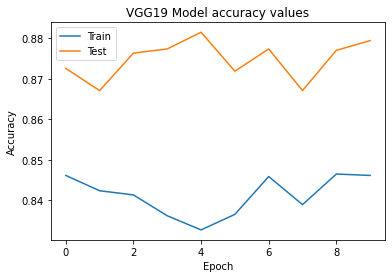

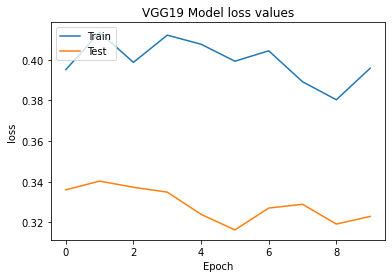

In [26]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('VGG19 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('VGG19 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

In [27]:
test_loss, test_acc = best_model_vgg19.evaluate(valid_set_vgg19, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 10s 198ms/step - loss: 0.3418 - accuracy: 0.8637
test acc: 0.8637499809265137
test_loss: 0.34177154302597046


## EfficientNetB0

EfficientNet is a CNN model that uses a technique called compound coefficient to scale up the models. What this does is that it scales up one dimension at a time to figure out the best dimensions for each image. These three dimensions are width, depth, and image resolution. With that, EfficientNet is considered as the most powerful CNN model which is why we considered using it for our dataset.

In [28]:
from keras.applications.efficientnet import preprocess_input as enet_preprocess

train_datagen = ImageDataGenerator(
    preprocessing_function= enet_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    preprocessing_function= enet_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

In [29]:
train_set_enet = train_datagen.flow_from_directory('./train',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_enet = test_datagen.flow_from_directory('./valid',
                                            target_size = (255, 255),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [30]:
from tensorflow.keras.applications import EfficientNetB0

enet = EfficientNetB0(include_top=False, pooling='avg', weights='imagenet', input_shape=(255,255,3))

for layer in enet.layers:
  layer.trainable = False

def build_model_enet(hp):
    x = Flatten()(enet.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_enet = Model(inputs=enet.input, outputs=prediction)
    model_enet.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_enet

In [31]:
tuner_enet = RandomSearch(
        build_model_enet,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='Enet_Hyperparameter_Tuning')

tuner_enet.search(train_set_enet, epochs = 3, validation_data = valid_set_enet)

Trial 3 Complete [00h 45m 38s]
val_accuracy: 0.9109794795513153

Best val_accuracy So Far: 0.9109794795513153
Total elapsed time: 02h 16m 31s
INFO:tensorflow:Oracle triggered exit


In [32]:
best_model_enet = tuner_enet.get_best_models()[0]

best_model_enet.summary()
for i, layer in enum,erate(best_model_enet.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 255, 255, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 255, 255, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 255, 255, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 64, 64, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 64, 64, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 64, 64, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 64, 64, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 32, 32, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 32, 32, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 32, 32, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 32, 32, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 16, 16, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 16, 16, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 16, 16, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 16, 16, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 16, 16, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 16, 16, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 8, 8, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 8, 8, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 8, 8, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 8, 8, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

NameError: name 'enum' is not defined

In [33]:
checkpoint = ModelCheckpoint(filepath='enet.h5',
                             save_best_only=True,
                             monitor= 'val_accuracy',
                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_enet.filenames)//batch_size
history_enet = best_model_enet.fit(train_set_enet, epochs = 10, validation_data = valid_set_enet,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_enet = datetime.now() - start
print("Training completed in time: ", duration_enet)

Epoch 1/10
91/91 [==============================] - 50s 513ms/step - loss: 0.3184 - accuracy: 0.8729 - val_loss: 0.2271 - val_accuracy: 0.9090
Epoch 2/10
91/91 [==============================] - 46s 505ms/step - loss: 0.3204 - accuracy: 0.8723 - val_loss: 0.2182 - val_accuracy: 0.9155
Epoch 3/10
91/91 [==============================] - 46s 502ms/step - loss: 0.2992 - accuracy: 0.8836 - val_loss: 0.2198 - val_accuracy: 0.9131
Epoch 4/10
91/91 [==============================] - 46s 504ms/step - loss: 0.3108 - accuracy: 0.8815 - val_loss: 0.2519 - val_accuracy: 0.8929
Epoch 5/10
91/91 [==============================] - 46s 503ms/step - loss: 0.3197 - accuracy: 0.8743 - val_loss: 0.2275 - val_accuracy: 0.9131
Epoch 6/10
91/91 [==============================] - 46s 502ms/step - loss: 0.2888 - accuracy: 0.8822 - val_loss: 0.2331 - val_accuracy: 0.9076
Epoch 7/10
91/91 [==============================] - 45s 499ms/step - loss: 0.3025 - accuracy: 0.8874 - val_loss: 0.2281 - val_accuracy: 0.9032

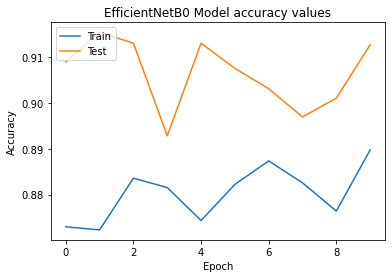

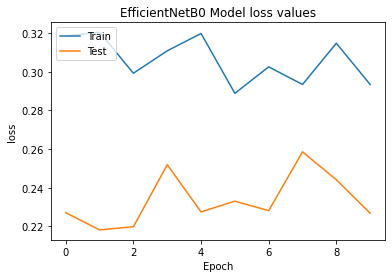

In [34]:
plt.plot(history_enet.history['accuracy'])
plt.plot(history_enet.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_enet.history['loss'])
plt.plot(history_enet.history['val_loss'])
plt.title('EfficientNetB0 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
test_loss, test_acc = best_model_enet.evaluate(valid_set_enet, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 13s 259ms/step - loss: 0.2135 - accuracy: 0.9100
test acc: 0.9100000262260437
test_loss: 0.2135317176580429
